#  Hawkes processes 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize
from hawkes_process import thinning_hawkes
from scipy.stats import norm
from estimate_exac import estimate_hawkes_params, hawkes_test, hawkes_test2,hawkes_test3
from estimator_class import estimate_hawkes_params_, hawkes_test_, hawkes_test2_,hawkes_test3_

## I. Simulation

In this section, we simulate point process realizations corresponding to the three kernels introduced above: the exponential kernel, the box kernel, and the Gaussian kernel.



The conditional intensity function is given by

$$\lambda^{*}(t) = \mu + \int_{0}^{t} h(t - s)\, dH_{s}$$



**a) Exponential case: $h(t) = \alpha e^{-\beta t}$**

Then
$
\lambda^{*}(t) = \mu + \int_{0}^{t} \alpha e^{-\beta (t - s)}\, dH_{s}
= \mu + \sum_{T_i < t} \alpha e^{-\beta (t - T_i)}.
$

We require
$
\frac{\alpha}{\beta} < 1
$
so that
$
\|h\|_{1} < 1.
$


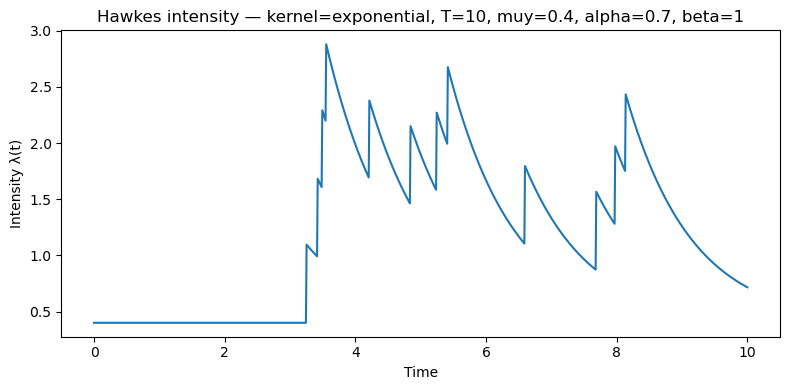

In [15]:
mu=0.4
alpha=0.7
beta=1
T=10
me = thinning_hawkes(mu, alpha, beta,T, kernel_type='exponential')
e = me.simulate()
me.plot_intensity(1000,T)


**b) Box kernel case:
$
\lambda(t) = \mu + \alpha\, N_{\text{active}}(t),
$**

where
$
N_{\text{active}}(t) = 
\#\Bigl\{\, k \;\big|\; 0 \le t - t_k < \beta \,\Bigr\}
$ is the number of past events that occurred within the last $\beta$ units of time (i.e., the number of ``active'' events at time $t$).


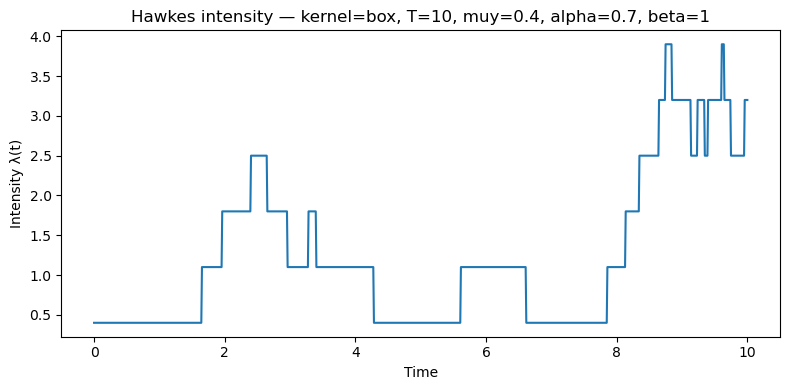

In [19]:
mu=0.4
alpha=0.7
beta=1
T=10

me = thinning_hawkes(mu, alpha, beta,T, kernel_type='box')
e = me.simulate()
me.plot_intensity(1000,T)



**c) Gaussian kernel case: 
$\lambda(u) = \alpha \exp\!\!\left(-\frac{u^{2}}{2\beta^{2}}\right)\mathbf{1}_{\{u \ge 0\}}.$**

Then conditional intensity is
$\lambda^{*}(t) = \mu + \sum_{T_i < t} \lambda(t - T_i) = 
\mu + \alpha \sum_{T_i < t} \exp\!\!\left(-\frac{(t - T_i)^{2}}{2\beta^{2}}\right).$


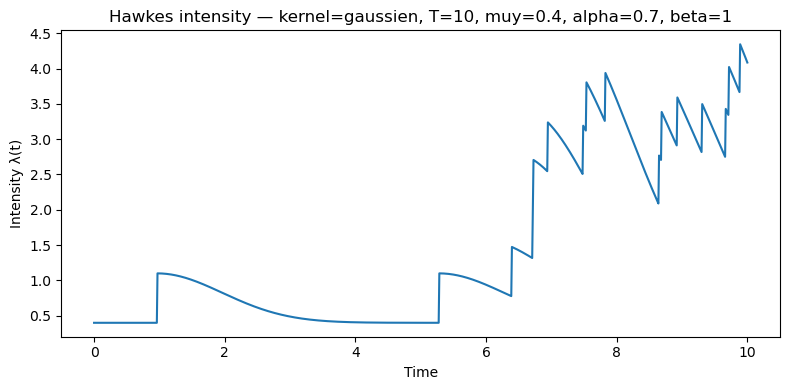

In [24]:
mu=0.4
alpha=0.7
beta=1
T=10
me = thinning_hawkes(mu, alpha, beta,T, kernel_type='gaussien')
e = me.simulate()
me.plot_intensity(1000,T)


## II. Maximum Likelihood Estimators

In [25]:
mu=0.4
alpha=0.7
beta=1
T_=[10,50,100,500,1000,3000,5000,10000]
for T in T_:
    me = thinning_hawkes(mu, alpha, beta,T, kernel_type='exponential')
    e = me.simulate()
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(e, T)
    print(T,mu_hat, alpha_hat, beta_hat)


10 0.28568258617144926 0.5646112354041987 0.38929687365775406
50 0.2975991196818416 0.575633312241541 0.9875960615779262
100 0.4900213173765387 0.9983234207092355 1.342618693712606
500 0.37450450293060294 0.8807280407004179 1.1857382502419864
1000 0.3441572638639711 0.7670632000294321 1.0622493711768928
3000 0.4018204404242897 0.7349052586448508 1.0866485340574854
5000 0.3950380620578263 0.6649419792497069 0.942360057338481
10000 0.4230752895801946 0.6964272337577166 1.0106477163025835


In [26]:
mu=0.4
alpha=0.7
beta=1
T_=[10,50,100,500,1000,3000,5000,10000]
for T in T_:
    me = thinning_hawkes(mu, alpha, beta,T, kernel_type='box')
    e = me.simulate()
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(e, T)
    print(T,mu_hat, alpha_hat, beta_hat)


10 0.0999999829955753 1e-05 1.0893778307729225
50 0.5343130586988564 0.7500322601090278 1.3191689874360328
100 0.43139076627969936 0.9025886568060499 1.62293065722595
500 0.40112716109295427 1.2267283793213626 1.6546529502073672
1000 0.3930966788963168 1.0540371844892031 1.5465571488491772
3000 0.3803956804090168 1.1488011194360037 1.6373617289000892
5000 0.37626722936322393 1.219174024025039 1.7282388459265225
10000 0.3735010240487117 1.2083593151754668 1.6627727758751099


In [32]:
T = 5000
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
mu_ = []
a_=[]
b_=[]


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    mu_.append(mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


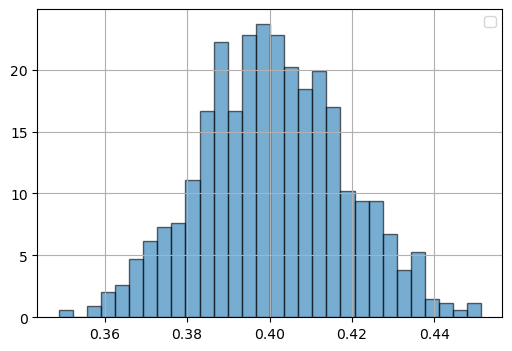

In [33]:

plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    mu_,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',
)


plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


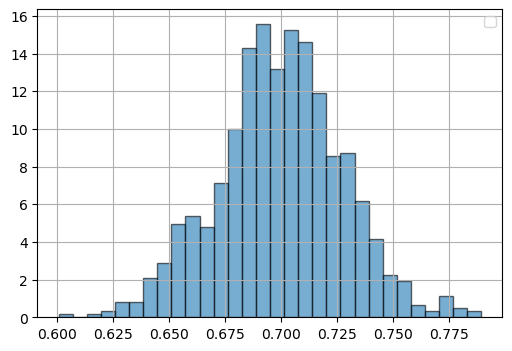

In [34]:

plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    a_,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',
)


plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


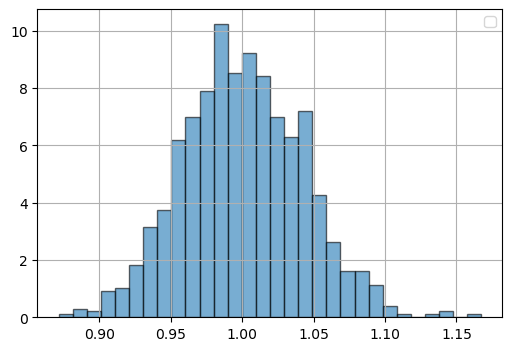

In [35]:

plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    b_,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',
)


plt.legend()
plt.grid(True)
plt.show()

## III. Test Statistic

**Teste 1: Test for a Hawkes process with parameter fixed  based on the empirical average rate**

$\mathcal{H}_0$: $H_t$ is a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

$\mathcal{H}_1$: $H_t$ is not a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

a) Same $||h||_1$

In [36]:
T = 3000
mu = 0.4
alpha = 0.7
beta = 1
l1_se=0


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1_se+=1


In [37]:
T = 1000
mu = 0.4
alpha = 0.7
beta = 1
l1_sb=0
for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1_sb+=1

In [38]:
print(l1_se/1000)
print(l1_sb/1000)

0.04
0.037


b) Difference $||h||_1$

In [39]:
mu=0.3
alpha=0.5
beta=0.7
T_=1000
l1_de=0
for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1_de+=1


In [40]:
mu=0.3
alpha=0.5
beta=0.7
T_=1000
l1_db=0


for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l1_db+=1


In [41]:
print(l1_de/1000)
print(l1_db/1000)


0.05
1.0


**Teste 2: Test for a Hawkes process with parameter fixed based on the maximum likelihood estimator**

$\mathcal{H}_0$: $H_t$ is a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

$\mathcal{H}_1$: $H_t$ is not a Hawkes process with exponential kernel of parameter $\theta = (\mu, \alpha, \beta)$.

a) Same $||h||_1$

In [42]:
T = 1000
mu = 0.4
alpha = 0.7
beta = 1
l2_se=0
Realite = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()

    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    if hawkes_test2(T,Realite, X,variance_hat, alpha_level=0.05)==1:
        l2_se+=1

In [43]:
T = 1000
mu = 0.4
alpha = 0.7
beta = 1
l2_sb=0
Realite = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()

    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    if hawkes_test2(T,Realite, X,variance_hat, alpha_level=0.05)==1:
        l2_sb+=1

In [44]:
print(l2_se/1000)
print(l2_sb/1000)


0.066
0.043


b) Difference $||h||_1$

In [46]:
T = 1000
mu=0.3
alpha=0.5
beta=0.7
l2_de=0
Realite = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    if hawkes_test2(T,Realite, X,variance_hat, alpha_level=0.05)==1:
        l2_de+=1

In [47]:
T = 1000
mu=0.3
alpha=0.5
beta=0.7
l2_db=0
Realite = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()

    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(events, T)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    if hawkes_test2(T,Realite, X,variance_hat, alpha_level=0.05)==1:
        l2_db+=1

In [48]:
print(l2_de/1000)
print(l2_db/1000)

0.09
1.0


**Teste 3: Test if the process is a Hawkes process with exponential kernel**

$\mathcal{H}_0$: $\exists\, (\mu,\alpha,\beta)\in\mathbb{R}_+^*\times\mathbb{R}_+\times(\alpha,+\infty)$ such that the point process $(H_t)_{t\ge 0}$ is a Hawkes process with an exponential kernel.

$\mathcal{H}_1$:$\nexists\, (\mu,\alpha,\beta)\in\mathbb{R}_+^*\times\mathbb{R}_+\times(\alpha,+\infty)$ such that $(H_t)_{t\ge 0}$ follows a Hawkes process with an exponential kernel.

a) Same $||h||_1$

In [8]:
T = 3000
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l33_se=0
l32_se=0
l31_se=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l33_se+=1
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l31_se+=1
    if hawkes_test2(T/3,lambda_bar, X,variance_hat, alpha_level=0.05)==1:
        l32_se+=1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


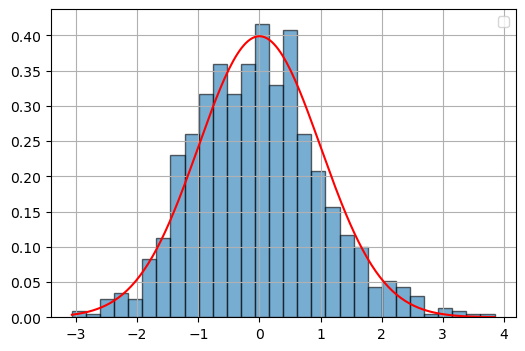

In [9]:

Tx=T/3

normalized3 =  ((np.array(Expo_events))/Tx -np.array(Espe_hat)) * np.sqrt(Tx)/np.sqrt(np.array(Var2)+mu / (1 - alpha/beta)**3)
plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    normalized3,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',

)

x = np.linspace(bins.min(), bins.max(), 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-')

plt.legend()
plt.grid(True)
plt.show()

In [10]:
print(l31_se/1000)
print(l32_se/1000)
print(l33_se/1000)

0.049
0.054
0.065


In [11]:
T = 3000
mu = 0.4
alpha = 0.7
beta = 1
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l33_sb=0
l32_sb=0
l31_sb=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l33_sb+=1
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l31_sb+=1
    if hawkes_test2(T/3,lambda_bar, X,variance_hat, alpha_level=0.05)==1:
        l32_sb+=1

In [12]:
print(l31_sb/1000)
print(l32_sb/1000)
print(l33_sb/1000)

0.056
0.04
0.045


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


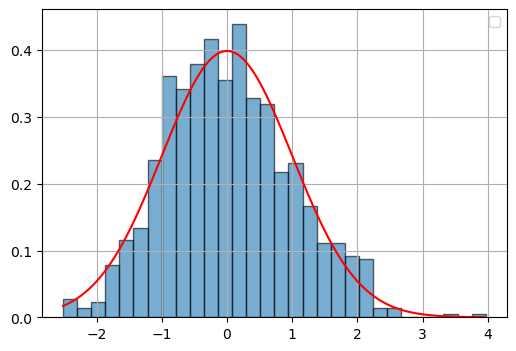

In [14]:

Tx=T/3

normalized3 =  ((np.array(Expo_events))/Tx -np.array(Espe_hat)) * np.sqrt(Tx)/np.sqrt(np.array(Var2)+mu / (1 - alpha/beta)**3)
plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    normalized3,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',

)

x = np.linspace(bins.min(), bins.max(), 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-')

plt.legend()
plt.grid(True)
plt.show()

b) Different $||h||_1$

In [2]:
T = 3000
mu=0.3
alpha=0.5
beta=0.7
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l33_de=0
l32_de=0
l31_de=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='exponential')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l33_de+=1
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l31_de+=1
    if hawkes_test2(T/3,lambda_bar, X,variance_hat, alpha_level=0.05)==1:
        l32_de+=1

In [3]:
print(l31_de/1000)
print(l32_de/1000)
print(l33_de/1000)

0.046
0.06
0.059


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


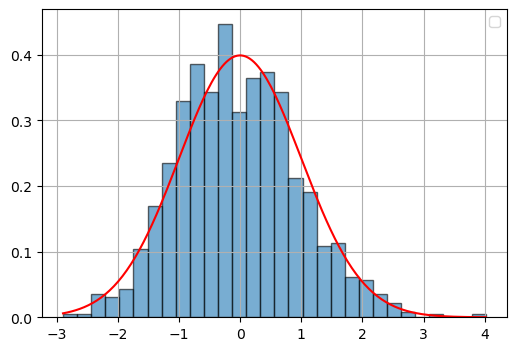

In [4]:

Tx=T/3

normalized3 =  ((np.array(Expo_events))/Tx -np.array(Espe_hat)) * np.sqrt(Tx)/np.sqrt(np.array(Var2)+mu / (1 - alpha/beta)**3)
plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    normalized3,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',

)

x = np.linspace(bins.min(), bins.max(), 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-')

plt.legend()
plt.grid(True)
plt.show()

In [19]:
T = 3000
mu=0.3
alpha=0.5
beta=0.7
Expo_events = []
Espe_hat = []
mu_ = []
a_=[]
b_=[]
Var2 = []
l33_db=0
l32_db=0
l31_db=0
lambda_bar = mu / (1 - alpha / beta)

for i in range(1000):
    m = thinning_hawkes(mu, alpha, beta, T, kernel_type='box')
    events = m.simulate()
    time_threshold_1 = T / 3
    time_threshold_2 = 2 * T / 3
    idx1 = 0
    while idx1 < len(events) and events[idx1] < time_threshold_1:
        idx1 += 1
    idx2 = idx1
    
    while idx2 < len(events) and events[idx2] < time_threshold_2:
        idx2 += 1
    list1 = events[0:idx1]
    list2 = events[idx1:idx2]
    list3 = np.array(events[idx2:])-2/3*T

    Expo_events.append(len(list1))
    L, mu_hat, alpha_hat, beta_hat, variance_hat = estimate_hawkes_params(list3, T/3)
    X = mu_hat / (1 - alpha_hat / beta_hat)
    Espe_hat.append(X)
    mu_.append( mu_hat)
    a_.append(alpha_hat)
    b_.append( beta_hat)
    Var2.append(variance_hat)
    
    if hawkes_test3(len(list1), T/3, mu_hat, alpha_hat, beta_hat, variance_hat, alpha_level=0.05)==1:
        l33_db+=1
    if hawkes_test(len(events), T, mu, alpha, beta, alpha_level=0.05)==1:
        l31_db+=1
    if hawkes_test2(T/3,lambda_bar, X,variance_hat, alpha_level=0.05)==1:
        l32_db+=1

In [20]:
print(l31_db/1000)
print(l32_db/1000)
print(l33_db/1000)

1.0
1.0
0.052


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


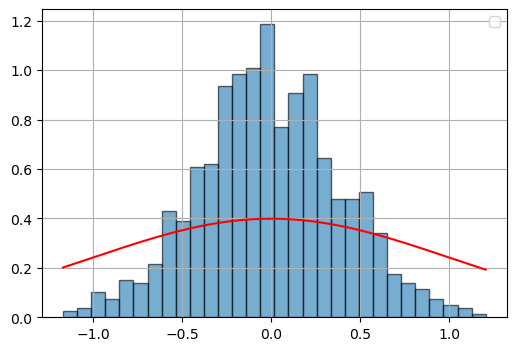

In [21]:

Tx=T/3

normalized3 =  ((np.array(Expo_events))/Tx -np.array(Espe_hat)) * np.sqrt(Tx)/np.sqrt(np.array(Var2)+mu / (1 - alpha/beta)**3)
plt.figure(figsize=(6,4))
count, bins, patches = plt.hist(
    normalized3,
    bins=30,
    density=True,     
    alpha=0.6,
    edgecolor='k',

)

x = np.linspace(bins.min(), bins.max(), 200)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-')

plt.legend()
plt.grid(True)
plt.show()